    1. draw distribution of natural hazards damage with rotations
    2. draw distribution of natural hazard damage without rotations

In [1]:
import pandas as pd
import numpy as np
import sys
import os
import string
import time as time
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mapclassify
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.transforms as transforms
from shapely.geometry import LineString
from shapely.affinity import rotate
import cartopy.crs as ccrs



pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 600)



## input data

In [2]:
df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')
df_wind=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\cyclone_county_year.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


In [3]:
gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')

In [4]:
df_wind=df_wind[(df_wind['year']>=2015) & (df_wind['year']<=2020)].groupby(['state','county']).sum()

In [5]:
gdf=gdf.merge(df_wind,on=['state','county'],how='left')

## draw distribution of natural hazards damage with rotations

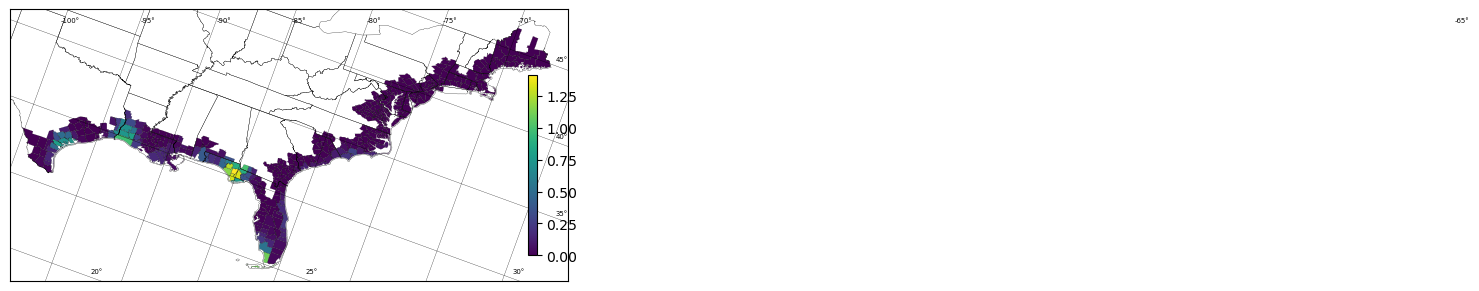

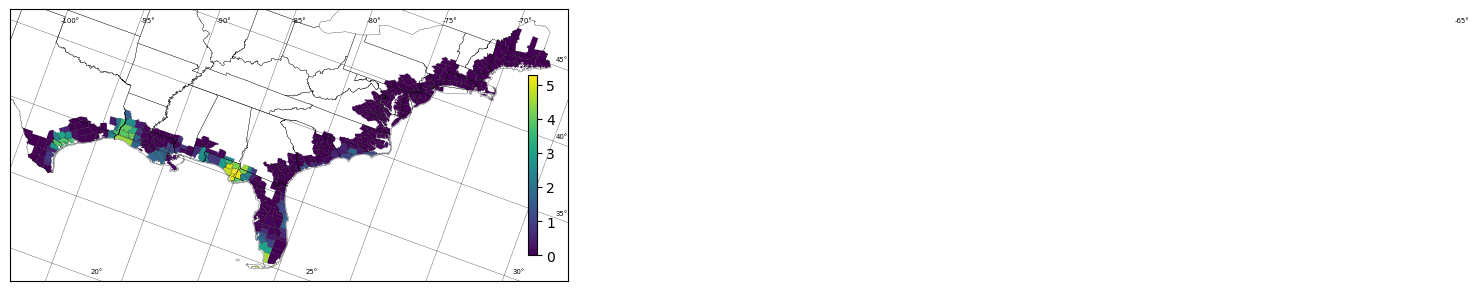

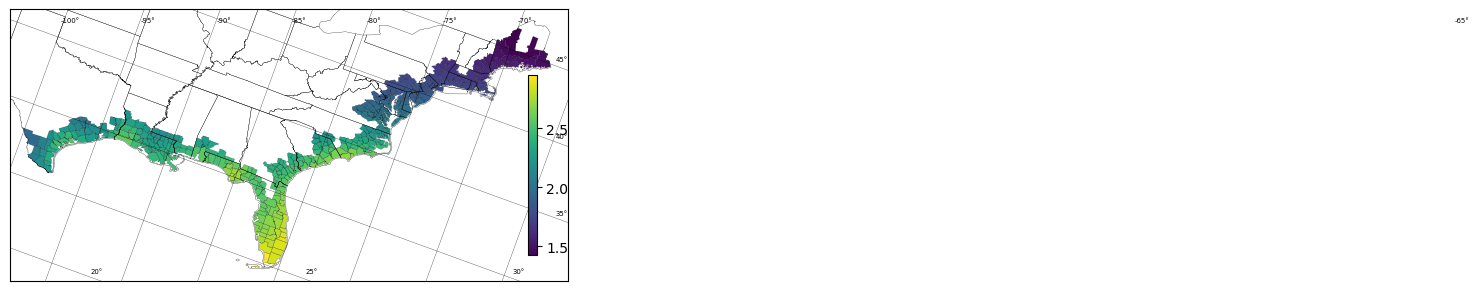

In [6]:
# draw for wind speed distribution

for windspeed in ['wf_50_3','wf_64_2','wf_0_3']:
    fig, ax = plt.subplots(1, 1, figsize=(9, 4.5)) 
    
    # plot us boundary
    gdf_plot_county=gdf.copy()    
    
    centroid_rotate=gdf_plot_county.unary_union.centroid
    
    gdf_plot_county['geometry']=gdf_plot_county.rotate(-20, origin=centroid_rotate).geometry
    gdf_plot_state=gdf_state.copy()
    gdf_plot_state['geometry']=gdf_plot_state.rotate(-20, origin=centroid_rotate).geometry
    
    gdf_plot_state.boundary.plot(ax=ax, color='Black', linewidth=0.2)
    
    gdf_plot_county.boundary.plot(ax=ax, color='Black', linewidth=0.1)
    gdf_plot_county['plot']=gdf_plot_county[windspeed]
    gdf_plot_county['plot'] = np.log(1+gdf_plot_county['plot'])
    gdf_plot_county.plot(column='plot', ax=ax,cmap='viridis',legend=False)
    
    # Create a colorbar manually
    sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(
        vmin=gdf_plot_county['plot'].min(),
        vmax=gdf_plot_county['plot'].max()
    ))
    sm._A = []  # Required for ScalarMappable
    cbar = fig.colorbar(sm, ax=ax, shrink=0.5, location='right')  # Adjust shrink as needed
    cbar.ax.set_position([0.7, 0.25, 0.25, 0.4])  # [x, y, width, height]
    
    gdf_line= gpd.GeoDataFrame(columns=["geometry"], geometry="geometry")
    
    latitude_list=[20,25,30,35,40,45]
    x_list=[-95.5,-80.5,-66,-63,-63,-63]
    y_list=[24.5,24.5,24.5,28.5,33.9,39.3]
    
    for i in np.arange(0,len(latitude_list)):
        # Define a horizontal line (example: spanning longitude -110 to -80 at latitude 30)
        horizontal_line = LineString([(-120, latitude_list[i]), (-50, latitude_list[i])])
        rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

        # Add the rotated line to the GeoDataFrame
        gdf_line.loc[0] = [rotated_line]
        gdf_line.plot(ax=ax,color='black',linewidth=0.2)
        ax.text(x_list[i], y_list[i], str(latitude_list[i])+"°", fontsize=5, ha='right', va='bottom')

    longitude_list=[-100,-95,-90,-85,-80,-75,-70,-65]
    x_list=[-97.1,-91.83333333333333, -86.56666666666666, -81.3, -76.03333333333333, -70.76666666666667,-65.5,0]
    y_list=[42,42,42,42,42,42,42,42]
    
    for i in np.arange(0,len(longitude_list)):
        horizontal_line = LineString([(longitude_list[i], 0), (longitude_list[i], 60)])
        rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

        # Add the rotated line to the GeoDataFrame
        gdf_line.loc[0] = [rotated_line]
        gdf_line.plot(ax=ax,color='black',linewidth=0.2)
        ax.text(x_list[i], y_list[i], str(longitude_list[i])+"°", fontsize=5, ha='right', va='bottom')
    
    ax.set_xlim(-102, -63)
    ax.set_ylim(24, 43)
    
    ax.set_xticks([])
    ax.set_yticks([])

    
#     fig.suptitle("cyclone events from 2000 to 2010 and wind damage model "+windspeed)
    fig.savefig(windspeed+"_distribution.png", dpi=200)
    plt.show()

Draw for damage distribution

In [7]:
df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')
df_fatality=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\FEMA_wind_county_year.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


df_fatality=df_fatality[(df_fatality['year']>=2015) & (df_fatality['year']<=2020)].groupby(['state','county']).sum()
df_fatality['fatality_rate']=df_fatality['fatality_rate']/6

gdf=gdf.merge(df_fatality,on=['state','county'],how='left')

In [8]:
print(gdf.dtypes)

GEO_ID                     object
STATE                      object
COUNTY                     object
NAME                       object
LSAD                       object
CENSUSAREA                float64
geometry                 geometry
geo                         int64
state                       int64
county                      int64
Unnamed: 0                  int64
area                      float64
shoreline                 float64
area_new                  float64
year                      float64
projectAmount             float64
federalShareObligated     float64
totalObligated            float64
ihpAmount                 float64
haAmount                  float64
replacementAmount         float64
NFIP_building             float64
NFIP_content              float64
wind_speed_33             float64
wf_33_2                   float64
wf_33_3                   float64
wind_speed_50             float64
wf_50_2                   float64
wf_50_3                   float64
wind_speed_64 

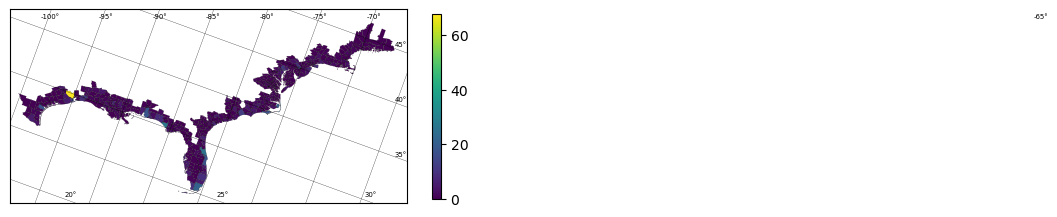

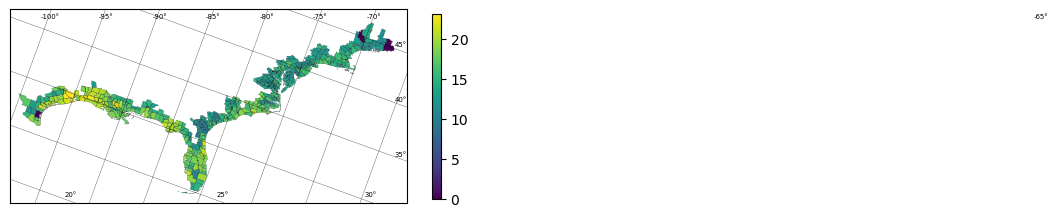

In [9]:
for windspeed in ['fatality','property_total']:
    fig, ax = plt.subplots(1, 1) 
    
    # plot us boundary
    gdf_plot_county=gdf.copy()    
    
    centroid_rotate=gdf_plot_county.unary_union.centroid
    
    gdf_plot_county['geometry']=gdf_plot_county.rotate(-20, origin=centroid_rotate).geometry
    
    gdf_plot_county.boundary.plot(ax=ax, color='Black', linewidth=0.1)
    gdf_plot_county['plot']=gdf_plot_county[windspeed]
    
    if windspeed!='fatality':
        gdf_plot_county['plot'] = np.log(1+gdf_plot_county['plot'])
        
    gdf_plot_county.plot(column='plot', ax=ax,cmap='viridis',legend=True, legend_kwds={'shrink': 0.5})
    
    gdf_line= gpd.GeoDataFrame(columns=["geometry"], geometry="geometry")
    
    latitude_list=[20,25,30,35,40,45]
    x_list=[-95.5,-80.5,-66,-63,-63,-63]
    y_list=[24.5,24.5,24.5,28.5,33.9,39.3]
    
    for i in np.arange(0,len(latitude_list)):
        # Define a horizontal line (example: spanning longitude -110 to -80 at latitude 30)
        horizontal_line = LineString([(-120, latitude_list[i]), (-50, latitude_list[i])])
        rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

        # Add the rotated line to the GeoDataFrame
        gdf_line.loc[0] = [rotated_line]
        gdf_line.plot(ax=ax,color='black',linewidth=0.2)
        ax.text(x_list[i], y_list[i], str(latitude_list[i])+"°", fontsize=5, ha='right', va='bottom')

    longitude_list=[-100,-95,-90,-85,-80,-75,-70,-65]
    x_list=[-97.1,-91.83333333333333, -86.56666666666666, -81.3, -76.03333333333333, -70.76666666666667,-65.5,0]
    y_list=[42,42,42,42,42,42,42,42]
    
    for i in np.arange(0,len(longitude_list)):
        horizontal_line = LineString([(longitude_list[i], 0), (longitude_list[i], 60)])
        rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

        # Add the rotated line to the GeoDataFrame
        gdf_line.loc[0] = [rotated_line]
        gdf_line.plot(ax=ax,color='black',linewidth=0.2)
        ax.text(x_list[i], y_list[i], str(longitude_list[i])+"°", fontsize=5, ha='right', va='bottom')
        
    
    # Adjust legend position to the bottom-right
    legend = ax.get_legend()
    if legend:
        legend.set_bbox_to_anchor((1, 0))  # Place legend at the bottom-right
        legend.set_loc('lower right')  # Align it to the lower right corner
        
    
    ax.set_xlim(-102, -63)
    ax.set_ylim(24, 43)
    
    ax.set_xticks([])
    ax.set_yticks([])

    
#     fig.suptitle("cyclone events from 2000 to 2010 and wind damage model "+windspeed)
    fig.savefig(windspeed+"_distribution.png", dpi=200)
    plt.show()

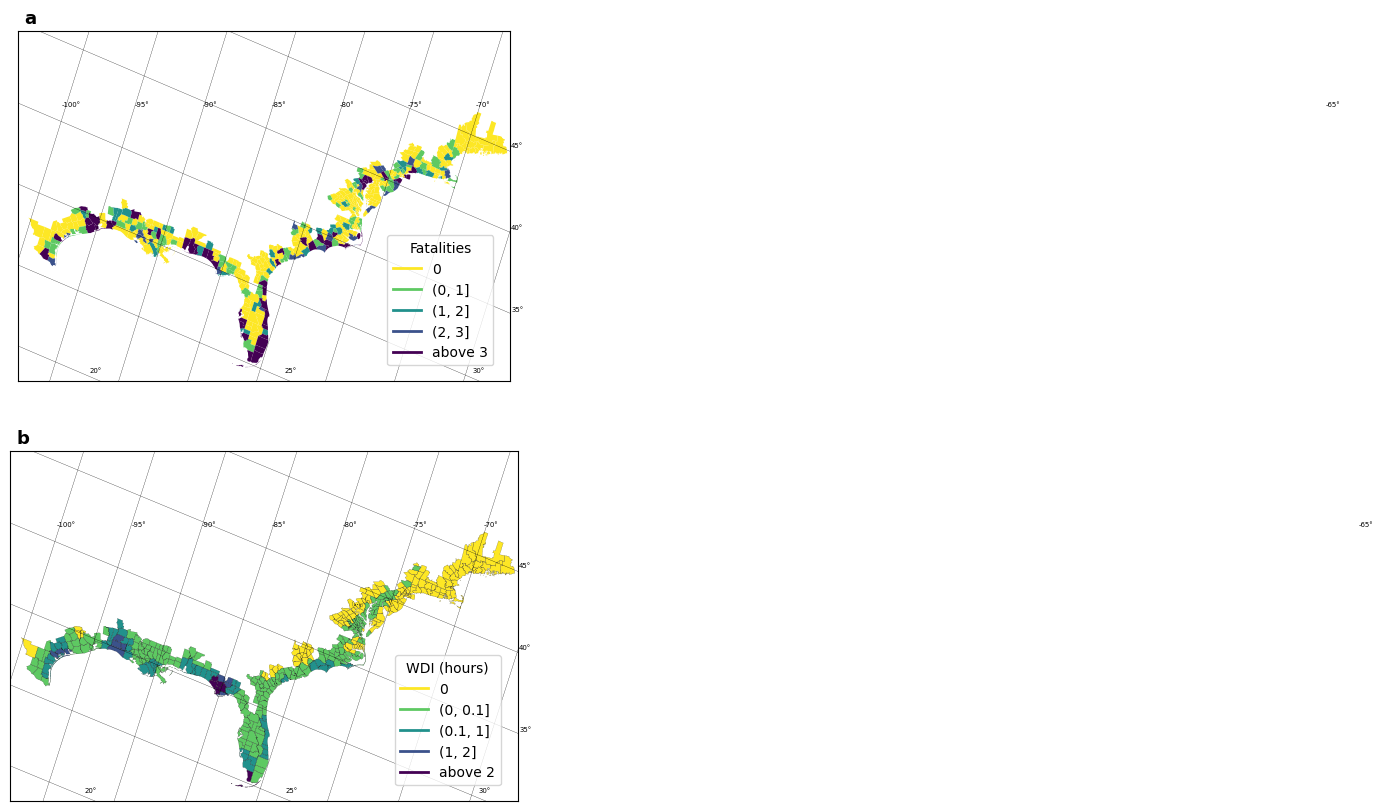

In [12]:
# combined version

# get color for plotting that is color blind friendly
viridis = plt.cm.viridis
colors = [viridis(i) for i in np.linspace(1, 0, 5)]

fig, axes = plt.subplots(2, 1,figsize=(12, 10)) 

# plot for fatality
df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



df_fatality=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\FEMA_wind_county_year.csv')
df_fatality=df_fatality[(df_fatality['year']>=2015) & (df_fatality['year']<=2020)].groupby(['state','county']).sum()

gdf=gdf.merge(df_fatality,on=['state','county'],how='left')

gdf_plot_county=gdf.copy()    

centroid_rotate=gdf_plot_county.unary_union.centroid

gdf_plot_county['geometry']=gdf_plot_county.rotate(-20, origin=centroid_rotate).geometry

gdf_plot_county.boundary.plot(ax=ax, color='Black', linewidth=0.1)
gdf_plot_county['plot']=gdf_plot_county[windspeed]

gdf_line= gpd.GeoDataFrame(columns=["geometry"], geometry="geometry")

latitude_list=[20,25,30,35,40,45]
x_list=[-95.5,-80.5,-66,-63,-63,-63]
y_list=[24.5,24.5,24.5,28.5,33.9,39.3]
    
for i in np.arange(0,len(latitude_list)):
    # define lines
    horizontal_line = LineString([(-120, latitude_list[i]), (-50, latitude_list[i])])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[0],color='black',linewidth=0.2)
    axes[0].text(x_list[i], y_list[i], str(latitude_list[i])+"°", fontsize=5, ha='right', va='bottom')

longitude_list=[-100,-95,-90,-85,-80,-75,-70,-65]
x_list=[-97.1,-91.83333333333333, -86.56666666666666, -81.3, -76.03333333333333, -70.76666666666667,-65.5,0]
y_list=[42,42,42,42,42,42,42,42]

for i in np.arange(0,len(longitude_list)):
    # define lines
    horizontal_line = LineString([(longitude_list[i], 0), (longitude_list[i], 60)])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[0],color='black',linewidth=0.2)
    axes[0].text(x_list[i], y_list[i], str(longitude_list[i])+"°", fontsize=5, ha='right', va='bottom')
    



# Plot the GeoDataFrame using the defined intervals
gdf_plot_county[(gdf_plot_county['fatality']==0)].plot(ax=axes[0],color=colors[0],label="0")
gdf_plot_county[(gdf_plot_county['fatality']>0)&(gdf_plot_county['fatality']<=1)].plot(ax=axes[0],color=colors[1])
gdf_plot_county[(gdf_plot_county['fatality']>1)&(gdf_plot_county['fatality']<=2)].plot(ax=axes[0],color=colors[2])
gdf_plot_county[(gdf_plot_county['fatality']>2)&(gdf_plot_county['fatality']<=3)].plot(ax=axes[0],color=colors[3])
gdf_plot_county[(gdf_plot_county['fatality']>3)].plot(ax=axes[0],color=colors[4])


# Create legend manually using custom handles
handles = [
    Line2D([0], [0], color=colors[0], lw=2, label="0"),
    Line2D([0], [0], color=colors[1], lw=2, label="(0, 1]"),
    Line2D([0], [0], color=colors[2], lw=2, label="(1, 2]"),
    Line2D([0], [0], color=colors[3], lw=2, label="(2, 3]"),
    Line2D([0], [0], color=colors[4], lw=2, label="above 3")
]

# Add the legend
axes[0].legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.025), ncol=1,title="Fatalities")

# set limit
xlim = ([-102, -64])
ylim = ([24, 47])
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)

axes[0].set_xticks([])
axes[0].set_yticks([])







### Plot for wind damage

df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



df_wind=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\cyclone_county_year.csv')
df_wind=df_wind[(df_wind['year']>=2015) & (df_wind['year']<=2020)].groupby(['state','county']).sum()

gdf=gdf.merge(df_wind,on=['state','county'],how='left')


gdf_plot_county=gdf.copy()    

centroid_rotate=gdf_plot_county.unary_union.centroid

gdf_plot_county['geometry']=gdf_plot_county.rotate(-20, origin=centroid_rotate).geometry

gdf_plot_county.boundary.plot(ax=axes[1], color='Black', linewidth=0.1)
gdf_plot_county['plot']=gdf_plot_county['wf_50_3']

gdf_line= gpd.GeoDataFrame(columns=["geometry"], geometry="geometry")

latitude_list=[20,25,30,35,40,45]
x_list=[-95.5,-80.5,-66,-63,-63,-63]
y_list=[24.5,24.5,24.5,28.5,33.9,39.3]
    
for i in np.arange(0,len(latitude_list)):
    # define lines
    horizontal_line = LineString([(-120, latitude_list[i]), (-50, latitude_list[i])])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[1],color='black',linewidth=0.2)
    axes[1].text(x_list[i], y_list[i], str(latitude_list[i])+"°", fontsize=5, ha='right', va='bottom')

longitude_list=[-100,-95,-90,-85,-80,-75,-70,-65]
x_list=[-97.1,-91.83333333333333, -86.56666666666666, -81.3, -76.03333333333333, -70.76666666666667,-65.5,0]
y_list=[42,42,42,42,42,42,42,42]

for i in np.arange(0,len(longitude_list)):
    # define lines
    horizontal_line = LineString([(longitude_list[i], 0), (longitude_list[i], 60)])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[1],color='black',linewidth=0.2)
    axes[1].text(x_list[i], y_list[i], str(longitude_list[i])+"°", fontsize=5, ha='right', va='bottom')


# Plot the GeoDataFrame using the defined intervals
gdf_plot_county[(gdf_plot_county['wf_50_3']==0)].plot(ax=axes[1],color=colors[0],label="0")
gdf_plot_county[(gdf_plot_county['wf_50_3']>0)&(gdf_plot_county['wf_50_3']<=0.1)].plot(ax=axes[1] ,color=colors[1])
gdf_plot_county[(gdf_plot_county['wf_50_3']>0.1)&(gdf_plot_county['wf_50_3']<=1)].plot(ax=axes[1] ,color=colors[2])
gdf_plot_county[(gdf_plot_county['wf_50_3']>1)&(gdf_plot_county['wf_50_3']<=2)].plot(ax=axes[1] ,color=colors[3])
gdf_plot_county[(gdf_plot_county['wf_50_3']>2)].plot(ax=axes[1] ,color=colors[4])


# Create legend manually using custom handles
handles = [
    Line2D([0], [0], color=colors[0], lw=2, label="0"),
    Line2D([0], [0], color=colors[1], lw=2, label="(0, 0.1]"),
    Line2D([0], [0], color=colors[2], lw=2, label="(0.1, 1]"),
    Line2D([0], [0], color=colors[3], lw=2, label="(1, 2]"),
    Line2D([0], [0], color=colors[4], lw=2, label="above 2")
]

# Add the legend
axes[1] .legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.025), ncol=1,title="WDI (hours)")

# set limit
xlim = ([-102, -64])
ylim = ([24, 47])
axes[1] .set_xlim(xlim)
axes[1] .set_ylim(ylim)

axes[1].set_xticks([])
axes[1].set_yticks([])

# Add bold "a" and "b" to the top left of each subplot
axes[0].text(-101.5, 47.5, 'a', fontsize=13, fontweight='bold', transform=axes[0].transData)
axes[1].text(-101.5, 47.5, 'b', fontsize=13, fontweight='bold', transform=axes[1].transData)

fig.savefig("example_rotation.png", dpi=200)
plt.show()


# draw distribution of natural hazard damage without rotations

In [13]:
print(gdf['wf_50_3'].describe(percentiles=np.linspace(0.1, 1.0, 10)))

count    4.290000e+02
mean     1.162120e-01
std      3.798541e-01
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      4.829100e-07
50%      1.375820e-04
60%      1.191299e-03
70%      1.498104e-02
80%      5.789546e-02
90%      2.138923e-01
100%     3.104075e+00
max      3.104075e+00
Name: wf_50_3, dtype: float64


In [14]:
df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



In [15]:
df_fatality=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\FEMA_wind_county_year.csv')
df_fatality=df_fatality[(df_fatality['year']>=2015) & (df_fatality['year']<=2020)].groupby(['state','county']).sum()
df_fatality['fatality_rate']=df_fatality['fatality_rate']/6

gdf=gdf.merge(df_fatality,on=['state','county'],how='left')

In [16]:
print(gdf['fatality'].describe(percentiles=np.linspace(0.1, 1.0, 10)))

count    429.000000
mean       1.675991
std        4.696753
min        0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        1.000000
70%        1.000000
80%        2.000000
90%        4.000000
100%      68.000000
max       68.000000
Name: fatality, dtype: float64


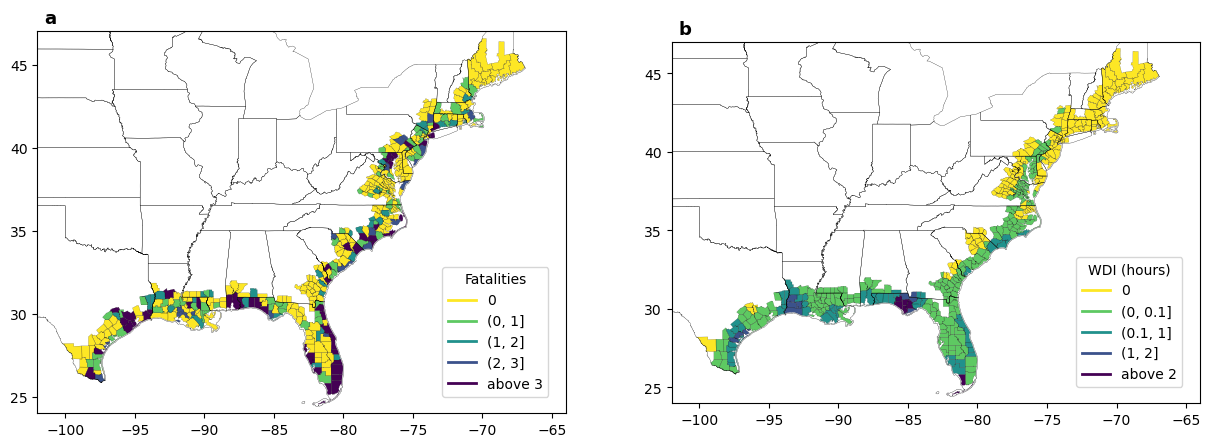

In [17]:
fig, axes = plt.subplots(1, 2,figsize=(15, 5)) 

# plot for all natural hazards
df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



df_fatality=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\FEMA_wind_county_year.csv')
df_fatality=df_fatality[(df_fatality['year']>=2015) & (df_fatality['year']<=2020)].groupby(['state','county']).sum()
df_fatality['fatality_rate']=df_fatality['fatality_rate']/6

gdf=gdf.merge(df_fatality,on=['state','county'],how='left')


gdf_plot_county=gdf.copy()
gdf_plot_county.boundary.plot(ax=axes[0], color='Black', linewidth=0.1)
gdf_plot_county['plot']=gdf_plot_county['fatality']


gdf_state.boundary.plot(ax=axes[0], color='Black', linewidth=0.2)

# plot the interval
viridis = plt.cm.viridis  # Viridis colormap
# np.linspace generates evenly spaced numbers over the range [0, 1] for the colormap
colors = [viridis(i) for i in np.linspace(1, 0, 5)]

# Plot the GeoDataFrame using the defined intervals
gdf_plot_county[(gdf_plot_county['fatality']==0)].plot(ax=axes[0],color=colors[0],label="0")
gdf_plot_county[(gdf_plot_county['fatality']>0)&(gdf_plot_county['fatality']<=1)].plot(ax=axes[0],color=colors[1])
gdf_plot_county[(gdf_plot_county['fatality']>1)&(gdf_plot_county['fatality']<=2)].plot(ax=axes[0],color=colors[2])
gdf_plot_county[(gdf_plot_county['fatality']>2)&(gdf_plot_county['fatality']<=3)].plot(ax=axes[0],color=colors[3])
gdf_plot_county[(gdf_plot_county['fatality']>3)].plot(ax=axes[0],color=colors[4])


# Create legend manually using custom handles
handles = [
    Line2D([0], [0], color=colors[0], lw=2, label="0"),
    Line2D([0], [0], color=colors[1], lw=2, label="(0, 1]"),
    Line2D([0], [0], color=colors[2], lw=2, label="(1, 2]"),
    Line2D([0], [0], color=colors[3], lw=2, label="(2, 3]"),
    Line2D([0], [0], color=colors[4], lw=2, label="above 3")
]

# Add the legend
axes[0].legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.025), ncol=1,title="Fatalities")

# set limit
xlim = ([-102, -64])
ylim = ([24, 47])
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)









### Plot for wind damage

df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



df_wind=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\cyclone_county_year.csv')
df_wind=df_wind[(df_wind['year']>=2015) & (df_wind['year']<=2020)].groupby(['state','county']).sum()

gdf=gdf.merge(df_wind,on=['state','county'],how='left')

### plot for wind damage index
# plot for wind damage index
gdf_plot_county=gdf.copy()
gdf_plot_county.boundary.plot(ax=axes[1] , color='Black', linewidth=0.1)
gdf_plot_county['plot']=gdf_plot_county['wf_50_3']


gdf_state.boundary.plot(ax=axes[1] , color='Black', linewidth=0.2)

# plot the interval
viridis = plt.cm.viridis  # Viridis colormap
# np.linspace generates evenly spaced numbers over the range [0, 1] for the colormap
colors = [viridis(i) for i in np.linspace(1, 0, 5)]


# Plot the GeoDataFrame using the defined intervals
gdf_plot_county[(gdf_plot_county['wf_50_3']==0)].plot(ax=axes[1],color=colors[0],label="0")
gdf_plot_county[(gdf_plot_county['wf_50_3']>0)&(gdf_plot_county['wf_50_3']<=0.1)].plot(ax=axes[1] ,color=colors[1])
gdf_plot_county[(gdf_plot_county['wf_50_3']>0.1)&(gdf_plot_county['wf_50_3']<=1)].plot(ax=axes[1] ,color=colors[2])
gdf_plot_county[(gdf_plot_county['wf_50_3']>1)&(gdf_plot_county['wf_50_3']<=2)].plot(ax=axes[1] ,color=colors[3])
gdf_plot_county[(gdf_plot_county['wf_50_3']>2)].plot(ax=axes[1] ,color=colors[4])


# Create legend manually using custom handles
handles = [
    Line2D([0], [0], color=colors[0], lw=2, label="0"),
    Line2D([0], [0], color=colors[1], lw=2, label="(0, 0.1]"),
    Line2D([0], [0], color=colors[2], lw=2, label="(0.1, 1]"),
    Line2D([0], [0], color=colors[3], lw=2, label="(1, 2]"),
    Line2D([0], [0], color=colors[4], lw=2, label="above 2")
]

# Add the legend
axes[1] .legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.025), ncol=1,title="WDI (hours)")

# set limit
xlim = ([-102, -64])
ylim = ([24, 47])
axes[1] .set_xlim(xlim)
axes[1] .set_ylim(ylim)

# Add bold "a" and "b" to the top left of each subplot
axes[0].text(-101.5, 47.5, 'a', fontsize=13, fontweight='bold', transform=axes[0].transData)
axes[1].text(-101.5, 47.5, 'b', fontsize=13, fontweight='bold', transform=axes[1].transData)

fig.savefig("example_norotation.png", dpi=200)
plt.show()


In [ ]:
# combined version

# get color for plotting that is color blind friendly
viridis = plt.cm.viridis
colors = [viridis(i) for i in np.linspace(1, 0, 5)]

fig, axes = plt.subplots(2, 1,figsize=(12, 10)) 

# plot for fatality
df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



df_fatality=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\FEMA_wind_county_year.csv')
df_fatality=df_fatality[(df_fatality['year']>=2015) & (df_fatality['year']<=2020)].groupby(['state','county']).sum()

gdf=gdf.merge(df_fatality,on=['state','county'],how='left')

gdf_plot_county=gdf.copy()    

centroid_rotate=gdf_plot_county.unary_union.centroid

gdf_plot_county['geometry']=gdf_plot_county.rotate(-20, origin=centroid_rotate).geometry

gdf_plot_county.boundary.plot(ax=ax, color='Black', linewidth=0.1)
gdf_plot_county['plot']=gdf_plot_county[windspeed]

gdf_line= gpd.GeoDataFrame(columns=["geometry"], geometry="geometry")

latitude_list=[20,25,30,35,40,45]
x_list=[-95.5,-80.5,-66,-63,-63,-63]
y_list=[24.5,24.5,24.5,28.5,33.9,39.3]
    
for i in np.arange(0,len(latitude_list)):
    # define lines
    horizontal_line = LineString([(-120, latitude_list[i]), (-50, latitude_list[i])])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[0],color='black',linewidth=0.2)
    axes[0].text(x_list[i], y_list[i], str(latitude_list[i])+"°", fontsize=5, ha='right', va='bottom')

longitude_list=[-100,-95,-90,-85,-80,-75,-70,-65]
x_list=[-97.1,-91.83333333333333, -86.56666666666666, -81.3, -76.03333333333333, -70.76666666666667,-65.5,0]
y_list=[42,42,42,42,42,42,42,42]

for i in np.arange(0,len(longitude_list)):
    # define lines
    horizontal_line = LineString([(longitude_list[i], 0), (longitude_list[i], 60)])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[0],color='black',linewidth=0.2)
    axes[0].text(x_list[i], y_list[i], str(longitude_list[i])+"°", fontsize=5, ha='right', va='bottom')
    



# Plot the GeoDataFrame using the defined intervals
gdf_plot_county[(gdf_plot_county['fatality']==0)].plot(ax=axes[0],color=colors[0],label="0")
gdf_plot_county[(gdf_plot_county['fatality']>0)&(gdf_plot_county['fatality']<=1)].plot(ax=axes[0],color=colors[1])
gdf_plot_county[(gdf_plot_county['fatality']>1)&(gdf_plot_county['fatality']<=2)].plot(ax=axes[0],color=colors[2])
gdf_plot_county[(gdf_plot_county['fatality']>2)&(gdf_plot_county['fatality']<=3)].plot(ax=axes[0],color=colors[3])
gdf_plot_county[(gdf_plot_county['fatality']>3)].plot(ax=axes[0],color=colors[4])


# Create legend manually using custom handles
handles = [
    Line2D([0], [0], color=colors[0], lw=2, label="0"),
    Line2D([0], [0], color=colors[1], lw=2, label="(0, 1]"),
    Line2D([0], [0], color=colors[2], lw=2, label="(1, 2]"),
    Line2D([0], [0], color=colors[3], lw=2, label="(2, 3]"),
    Line2D([0], [0], color=colors[4], lw=2, label="above 3")
]

# Add the legend
axes[0].legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.025), ncol=1,title="Fatalities")

# set limit
xlim = ([-102, -64])
ylim = ([24, 47])
axes[0].set_xlim(xlim)
axes[0].set_ylim(ylim)

axes[0].set_xticks([])
axes[0].set_yticks([])







### Plot for wind damage

df_geo=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\coastal assignation\county_geo_update.csv')

gdf=gpd.read_file(r"C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\county shape file\2010_county.shp")
gdf['geo']=gdf['GEO_ID'].str[-5:].astype('int64')

df_geo['geo']=df_geo['state']*1000+df_geo['county']
gdf=gdf.merge(df_geo,on=['geo'],how='left')
gdf=gdf[(gdf['area_new']==1)|(gdf['area_new']==3) ].copy()

gdf.drop(['area','shoreline','area_new'],axis=1,inplace=True)


gdf_state=gpd.read_file(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data collection\GIS\state\tl_2010_us_state10.shp')



df_wind=pd.read_csv(r'C:\Users\zhu.2906\OneDrive - The Ohio State University\pythonProject\InfoUSA\data cleaning\county_wind_speed\cyclone_county_year.csv')
df_wind=df_wind[(df_wind['year']>=2015) & (df_wind['year']<=2020)].groupby(['state','county']).sum()

gdf=gdf.merge(df_wind,on=['state','county'],how='left')


gdf_plot_county=gdf.copy()    

centroid_rotate=gdf_plot_county.unary_union.centroid

gdf_plot_county['geometry']=gdf_plot_county.rotate(-20, origin=centroid_rotate).geometry

gdf_plot_county.boundary.plot(ax=axes[1], color='Black', linewidth=0.1)
gdf_plot_county['plot']=gdf_plot_county['wf_50_3']

gdf_line= gpd.GeoDataFrame(columns=["geometry"], geometry="geometry")

latitude_list=[20,25,30,35,40,45]
x_list=[-95.5,-80.5,-66,-63,-63,-63]
y_list=[24.5,24.5,24.5,28.5,33.9,39.3]
    
for i in np.arange(0,len(latitude_list)):
    # define lines
    horizontal_line = LineString([(-120, latitude_list[i]), (-50, latitude_list[i])])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[1],color='black',linewidth=0.2)
    axes[1].text(x_list[i], y_list[i], str(latitude_list[i])+"°", fontsize=5, ha='right', va='bottom')

longitude_list=[-100,-95,-90,-85,-80,-75,-70,-65]
x_list=[-97.1,-91.83333333333333, -86.56666666666666, -81.3, -76.03333333333333, -70.76666666666667,-65.5,0]
y_list=[42,42,42,42,42,42,42,42]

for i in np.arange(0,len(longitude_list)):
    # define lines
    horizontal_line = LineString([(longitude_list[i], 0), (longitude_list[i], 60)])
    rotated_line = rotate(horizontal_line, angle=-20,origin=centroid_rotate, use_radians=False)

    # Add the rotated line to the GeoDataFrame
    gdf_line.loc[0] = [rotated_line]
    gdf_line.plot(ax=axes[1],color='black',linewidth=0.2)
    axes[1].text(x_list[i], y_list[i], str(longitude_list[i])+"°", fontsize=5, ha='right', va='bottom')


# Plot the GeoDataFrame using the defined intervals
gdf_plot_county[(gdf_plot_county['wf_50_3']==0)].plot(ax=axes[1],color=colors[0],label="0")
gdf_plot_county[(gdf_plot_county['wf_50_3']>0)&(gdf_plot_county['wf_50_3']<=0.1)].plot(ax=axes[1] ,color=colors[1])
gdf_plot_county[(gdf_plot_county['wf_50_3']>0.1)&(gdf_plot_county['wf_50_3']<=1)].plot(ax=axes[1] ,color=colors[2])
gdf_plot_county[(gdf_plot_county['wf_50_3']>1)&(gdf_plot_county['wf_50_3']<=2)].plot(ax=axes[1] ,color=colors[3])
gdf_plot_county[(gdf_plot_county['wf_50_3']>2)].plot(ax=axes[1] ,color=colors[4])


# Create legend manually using custom handles
handles = [
    Line2D([0], [0], color=colors[0], lw=2, label="0"),
    Line2D([0], [0], color=colors[1], lw=2, label="(0, 0.1]"),
    Line2D([0], [0], color=colors[2], lw=2, label="(0.1, 1]"),
    Line2D([0], [0], color=colors[3], lw=2, label="(1, 2]"),
    Line2D([0], [0], color=colors[4], lw=2, label="above 2")
]

# Add the legend
axes[1] .legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.025), ncol=1,title="WDI (hours)")

# set limit
xlim = ([-102, -64])
ylim = ([24, 47])
axes[1] .set_xlim(xlim)
axes[1] .set_ylim(ylim)

axes[1].set_xticks([])
axes[1].set_yticks([])

# Add bold "a" and "b" to the top left of each subplot
axes[0].text(-101.5, 47.5, 'a', fontsize=13, fontweight='bold', transform=axes[0].transData)
axes[1].text(-101.5, 47.5, 'b', fontsize=13, fontweight='bold', transform=axes[1].transData)

fig.savefig("example_rotation.png", dpi=200)
plt.show()
